In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport
from dython import nominal

## 任务1：报名比赛，下载比赛数据集并完成读取
### 使用Pandas完成数据集读取

In [145]:
train = pd.read_csv('used_car_train_20200313/used_car_train_20200313.csv',delim_whitespace=True)
test = pd.read_csv('used_car_testB_20200421/used_car_testB_20200421.csv',delim_whitespace=True)
sample = pd.read_csv('used_car_sample_submit.csv')

In [146]:
train

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6.0,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1.0,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15.0,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10.0,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5.0,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10.0,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11.0,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11.0,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10.0,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


## 任务2：对数据字段进行理解，并对特征字段依次进行数据分析
### 使用Pandas对比赛数据集进行分析
#### 分析每个字段的取值、范围和类型
有空值的特征：v_12，v_13，v_14                             

In [147]:
# 统计空值情况
train.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    0
brand                    0
bodyType                 0
fuelType                 0
gearbox                  0
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                  1469
v_13                  3583
v_14                 14116
dtype: int64

In [148]:
# 统计取值情况
values = train.apply(pd.unique)
values

SaleID               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
name                 [736, 2262, 14874, 71865, 111080, 137642, 2402...
regDate              [20040402, 20030301, 20040403, 19960908, 20120...
model                [30.0, 40.0, 115.0, 109.0, 110.0, 24.0, 13.0, ...
brand                [6.0, 1.0, 15.0, 10.0, 5.0, 4.0, 14.0, 7.0, 9....
bodyType             [1.0, 2.0, 0.0, 5.0, 3.0, 6.0, 7.0, 4.0, 100.0...
fuelType             [0.0, 1.0, 116.0, 2.0, 3.0, 115.0, 15.0, 51.0,...
gearbox              [0.0, 1.0, 15.0, 90, 60, 0, 115, 50, -, 142, 8...
power                [60, 0, 163, 193, 68, 109, 150, 101, 179, 88, ...
kilometer            [12.5, 15.0, 5.0, 10.0, 2.0, 6.0, 3972, 1278, ...
notRepairedDamage    [0.0, -, 1.0, 0, 4825, 1326, 6792, 5765, 1141,...
regionCode           [1046, 4366, 2806, 434, 6977, 3690, 3073, 4000...
seller               [0, 20160402, 20160403, 20160330, 20160326, 60...
offerType            [0.0, 6900.0, 2800.0, 20160328.0, 20160330.0, ...
creatD

In [149]:
# 数据类型
train.dtypes

SaleID                 int64
name                   int64
regDate                int64
model                float64
brand                float64
bodyType             float64
fuelType             float64
gearbox               object
power                 object
kilometer             object
notRepairedDamage     object
regionCode             int64
seller                 int64
offerType            float64
creatDate            float64
price                float64
v_0                  float64
v_1                  float64
v_2                  float64
v_3                  float64
v_4                  float64
v_5                  float64
v_6                  float64
v_7                  float64
v_8                  float64
v_9                  float64
v_10                 float64
v_11                 float64
v_12                 float64
v_13                 float64
v_14                 float64
dtype: object

In [150]:
# 数据范围
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,regionCode,seller,offerType,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,148531.000000,146417.000000,135884.000000
mean,74999.500000,68349.172873,2.003417e+07,47.128953,8.052527,1.870747,1.394827,1.997783e+05,2.841478e+05,1.415701e+06,...,0.246643,0.062381,0.174574,0.296920,0.406928,-0.164371,-0.446352,-0.085471,0.022190,0.008456
std,43301.414527,61103.875095,5.364988e+04,49.535881,7.864603,5.221312,15.676749,1.985073e+06,2.376421e+06,5.151321e+06,...,0.116636,0.133581,0.927042,1.773396,1.962003,3.758661,2.002930,2.257730,1.267140,1.050417
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-0.273510,-8.206004,-8.399672,-9.168192,-9.404106,-9.639552,-6.113291,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,7.390000e+02,0.000000e+00,0.000000e+00,...,0.241064,0.000161,0.055272,0.036050,0.035225,-3.666042,-2.026105,-1.745234,-0.999703,-0.426907
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,2.010000e+03,0.000000e+00,0.000000e+00,...,0.256928,0.001547,0.090081,0.058523,0.063335,1.240603,-0.457218,-0.160305,0.008602,0.155026
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,3.719000e+03,0.000000e+00,0.000000e+00,...,0.265170,0.104255,0.120590,0.081996,0.094738,2.691063,1.115744,1.572130,0.929041,0.700543
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,999.000000,3500.000000,2.016041e+07,2.016041e+07,2.016041e+07,...,1.401999,1.387847,12.357011,18.819042,18.801218,18.802072,13.562011,11.147669,8.658418,2.743993


#### 结合比赛页面中具体字段的含义，对字段的取值分布进行分析
##### 离散值字段的处理及取值分布分析

In [191]:
subset_discrete = train[["price","name","model","brand","bodyType","fuelType","gearbox","notRepairedDamage","regionCode","seller","offerType"]]
subset_discrete["gearbox"][subset_discrete["gearbox"]!="-"] = subset_discrete["gearbox"][subset_discrete["gearbox"]!="-"].astype("float")
subset_discrete["notRepairedDamage"][subset_discrete["notRepairedDamage"]!="-"] = subset_discrete["notRepairedDamage"][subset_discrete["notRepairedDamage"]!="-"].astype("float")
subset_discrete["seller"][subset_discrete["seller"]!="-"] = subset_discrete["seller"][subset_discrete["seller"]!="-"].astype("float")
subset_discrete["offerType"][subset_discrete["offerType"]!="-"] = subset_discrete["offerType"][subset_discrete["offerType"]!="-"].astype("float")
subset_discrete = subset_discrete.astype({"name":"str","model":"str","brand":"str","bodyType":"int"})

In [192]:
subset_discrete["gearbox"][subset_discrete["gearbox"]=="-"] = "other"
subset_discrete["notRepairedDamage"][subset_discrete["notRepairedDamage"]=="-"] = "other"
subset_discrete["seller"][subset_discrete["seller"]=="-"] = "other"
subset_discrete["offerType"][subset_discrete["offerType"]=="-"] = "other"

In [193]:
subset_discrete['bodyType'][subset_discrete['bodyType'] >=8] = "other"
subset_discrete['fuelType'][subset_discrete['fuelType'] >=7] = "other"
subset_discrete["gearbox"][subset_discrete["gearbox"].isin([0.0,1.0])== False] = "other"
subset_discrete["notRepairedDamage"][subset_discrete["notRepairedDamage"].isin([0.0,1.0])== False] = "other"
subset_discrete["seller"][subset_discrete["seller"].isin([0.0,1.0])== False] = "other"
subset_discrete["offerType"][subset_discrete["offerType"].isin([0.0,1.0])== False] = "other"

<AxesSubplot:xlabel='model', ylabel='count'>

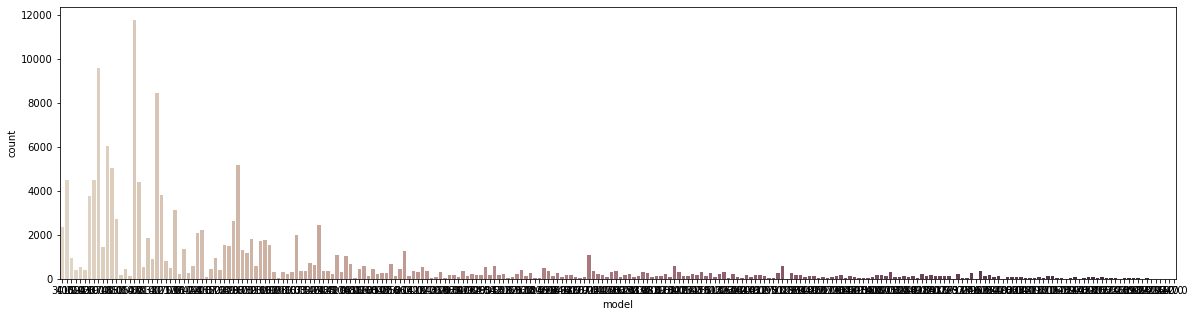

In [194]:
plt.figure(figsize=(20,5))
sns.countplot(x="model",  palette="ch:.25",data = subset_discrete)  

<AxesSubplot:xlabel='brand', ylabel='count'>

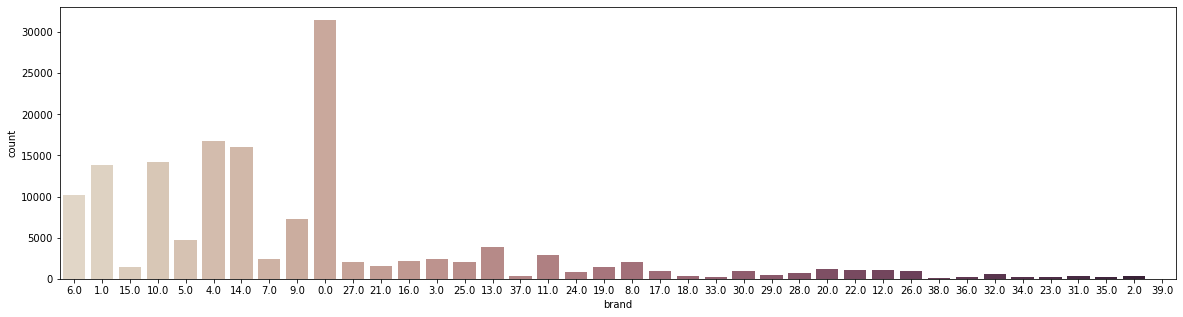

In [195]:
plt.figure(figsize=(20,5))
sns.countplot(x="brand",  palette="ch:.25",data = subset_discrete)                                

<AxesSubplot:xlabel='offerType', ylabel='count'>

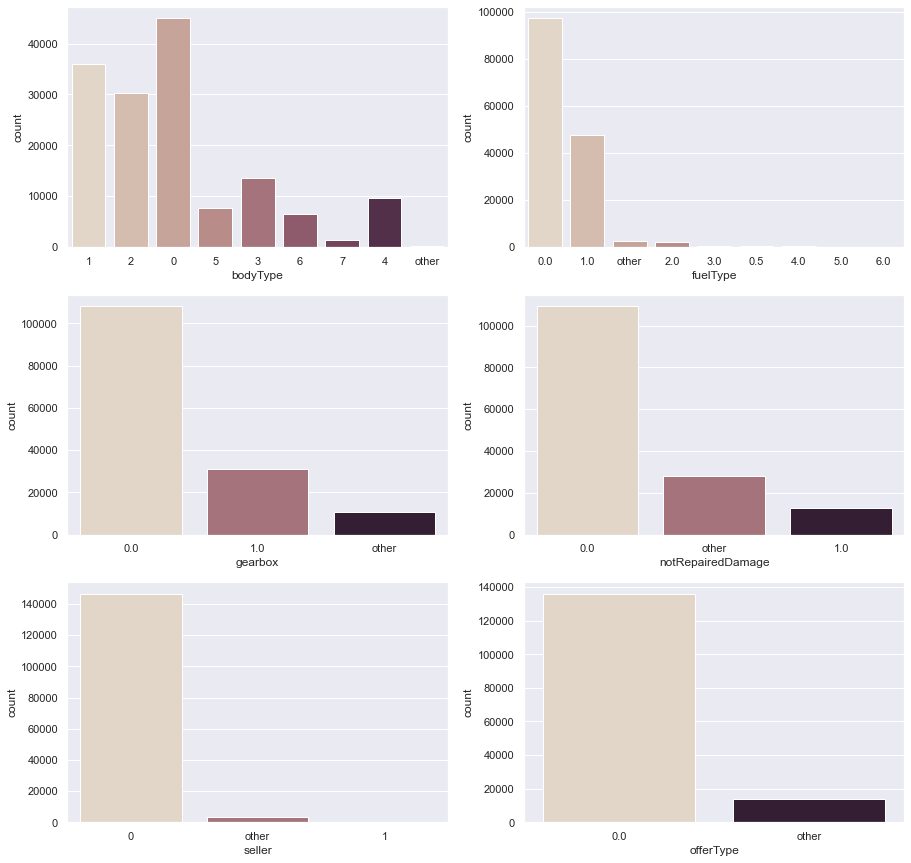

In [261]:
fig = plt.figure(figsize=(15,15))
fx1 = fig.add_subplot(3,2,1)
sns.countplot(x="bodyType",  palette="ch:.25",data = subset_discrete)
fx2 = fig.add_subplot(3,2,2)
sns.countplot(x="fuelType",  palette="ch:.25",data = subset_discrete)    
fx3 = fig.add_subplot(3,2,3)
sns.countplot(x="gearbox",  palette="ch:.25",data = subset_discrete) 
fx4 = fig.add_subplot(3,2,4)
sns.countplot(x="notRepairedDamage",  palette="ch:.25",data = subset_discrete) 
fx5 = fig.add_subplot(3,2,5)
sns.countplot(x="seller",  palette="ch:.25",data = subset_discrete) 
fx5 = fig.add_subplot(3,2,6)
sns.countplot(x="offerType",  palette="ch:.25",data = subset_discrete)  

In [202]:
len(train["regionCode"].unique())

7886

In [203]:
len(train["name"].unique())

99662

##### 连续值字段处理及分布分析

In [227]:
subset_continuous = train.iloc[:,17:]
subset_continuous["price"] = train["price"]
subset_continuous

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
0,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1850.0
1,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,3600.0
2,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,6222.0
3,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,2400.0
4,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,5200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,5900.0
149996,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,9500.0
149997,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,7500.0
149998,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,4999.0


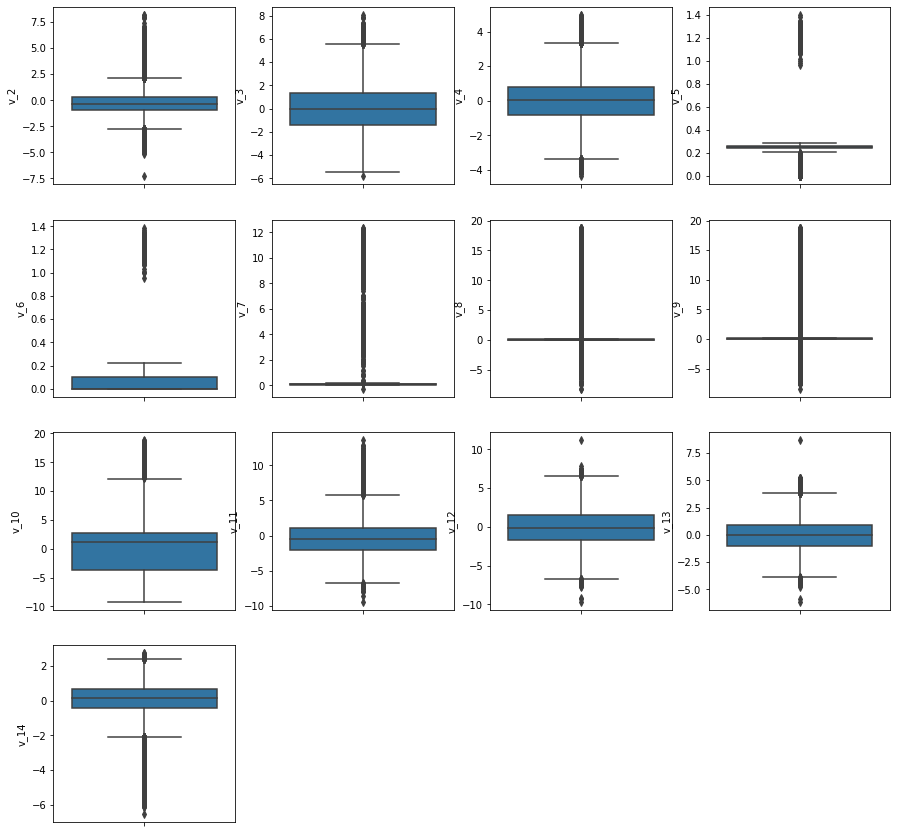

In [189]:
fig = plt.figure(figsize=(15,15))
for i in range(1,14):
    fx1 = fig.add_subplot(4,4,i)
    sns.boxplot( y=subset_continuous.iloc[:,i])

#### 计算特征字段与标签的相关性
##### 离散值字段与标签相关性分析

In [ ]:
#profile = ProfileReport(subset_discrete, title="Pandas Profiling Report")
#profile.to_widgets()

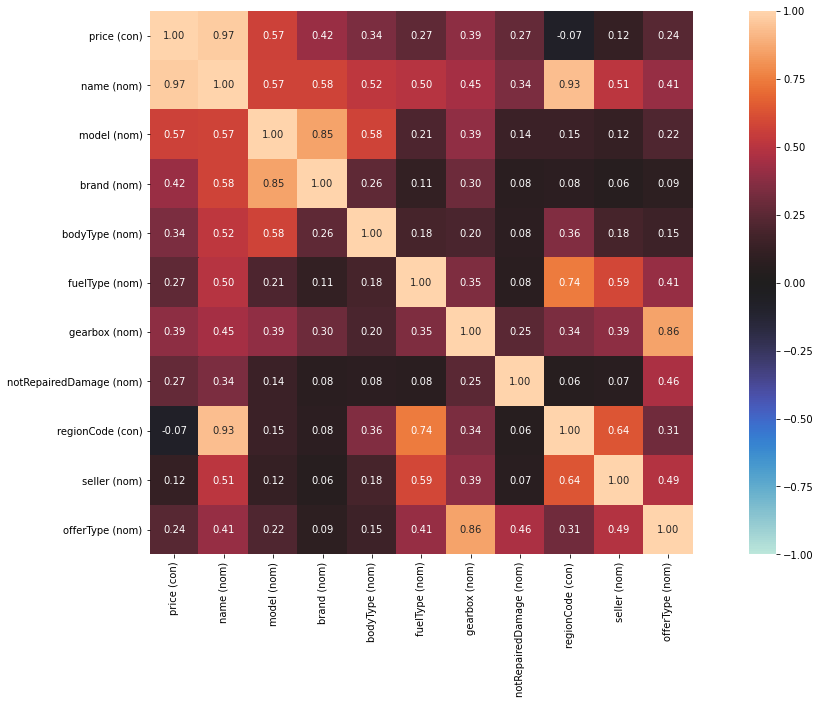

In [225]:
nominal.associations(subset_discrete,figsize=(20,10),mark_columns=True)

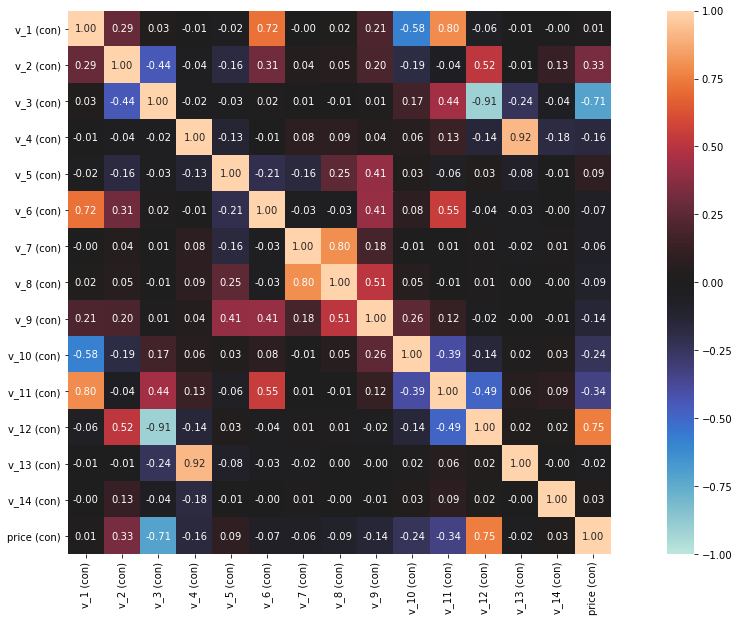

{'corr':              v_1 (con)  v_2 (con)  v_3 (con)  v_4 (con)  v_5 (con)  v_6 (con)  \
 v_1 (con)     1.000000   0.285585   0.027819  -0.006755  -0.017214   0.723588   
 v_2 (con)     0.285585   1.000000  -0.441125  -0.035185  -0.164776   0.307263   
 v_3 (con)     0.027819  -0.441125   1.000000  -0.016106  -0.028031   0.015055   
 v_4 (con)    -0.006755  -0.035185  -0.016106   1.000000  -0.131047  -0.006691   
 v_5 (con)    -0.017214  -0.164776  -0.028031  -0.131047   1.000000  -0.207101   
 v_6 (con)     0.723588   0.307263   0.015055  -0.006691  -0.207101   1.000000   
 v_7 (con)    -0.003462   0.039352   0.006221   0.084867  -0.158314  -0.029153   
 v_8 (con)     0.017358   0.050112  -0.009272   0.089077   0.251214  -0.027000   
 v_9 (con)     0.206387   0.195731   0.012809   0.044172   0.405207   0.409255   
 v_10 (con)   -0.578852  -0.186694   0.168849   0.058972   0.031855   0.081265   
 v_11 (con)    0.795870  -0.042081   0.442290   0.133914  -0.060257   0.553215   
 v_12 (c

In [229]:
nominal.associations(subset_continuous,figsize=(20,10),mark_columns=True)

#### 选择特征字段中与标签强相关的3个字段，绘制其余标签的分布关系图
##### 离散值 - 与标签分布关系图

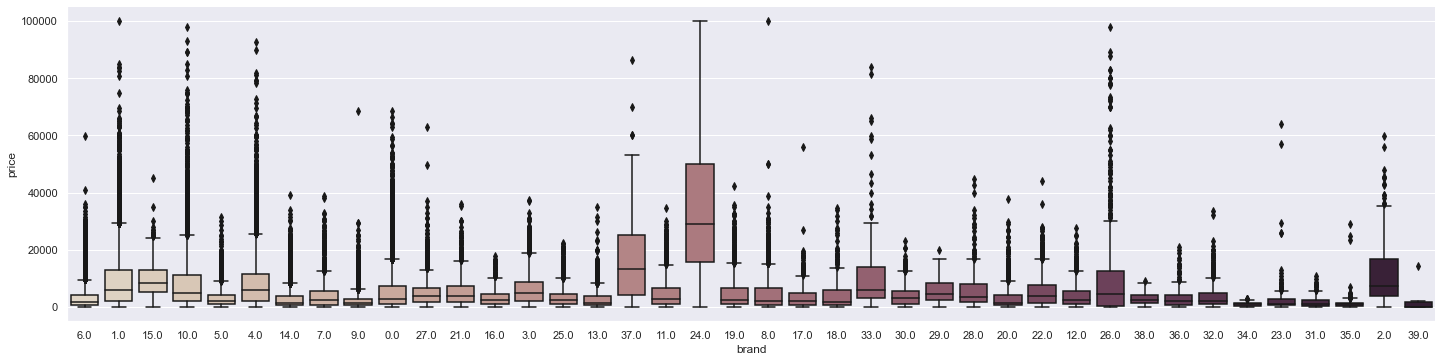

In [239]:
sns.catplot(x="brand", y="price",  palette="ch:.25",kind="box", data=subset_discrete,height=5, aspect=20/5)

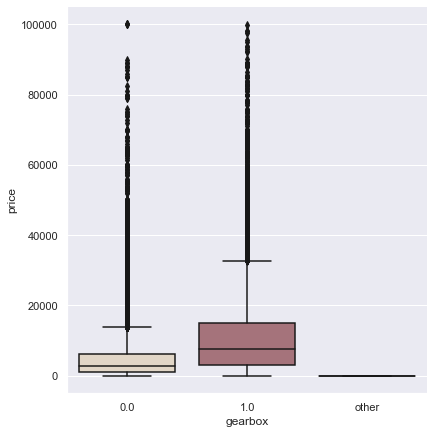

In [246]:
sns.catplot(x="gearbox", y="price",  palette="ch:.25",kind="box", data=subset_discrete,height=6, aspect=5/5)

##### 连续值 - 与标签分布关系图

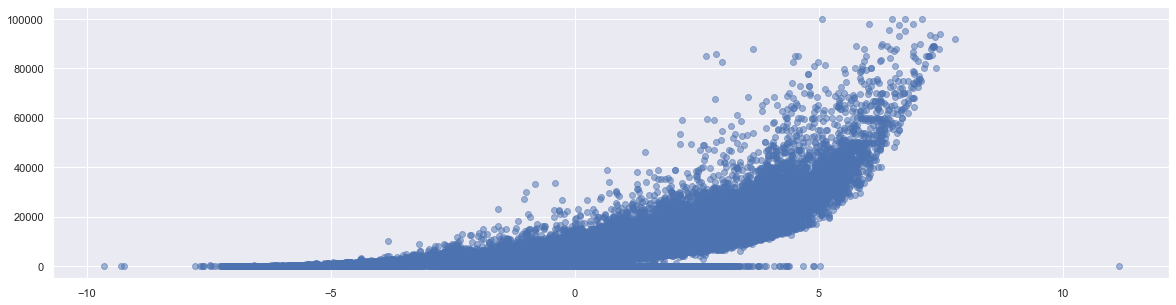

In [249]:
plt.scatter(x = "v_12", y = "price", alpha=0.5, data = subset_continuous)

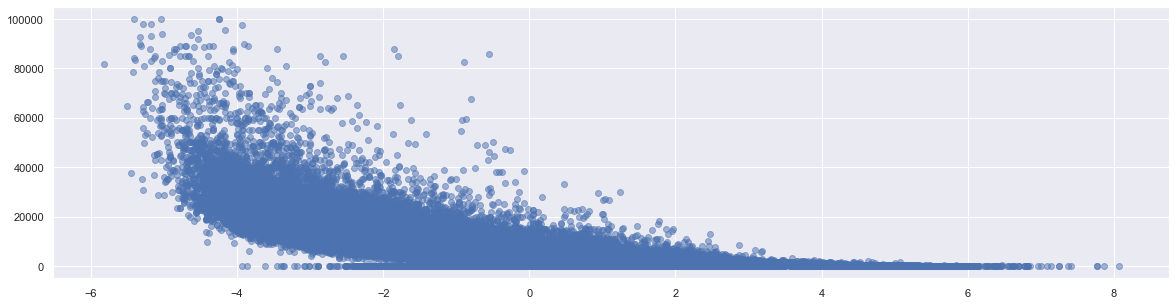

In [250]:
plt.scatter(x = "v_3", y = "price", alpha=0.5, data = subset_continuous)

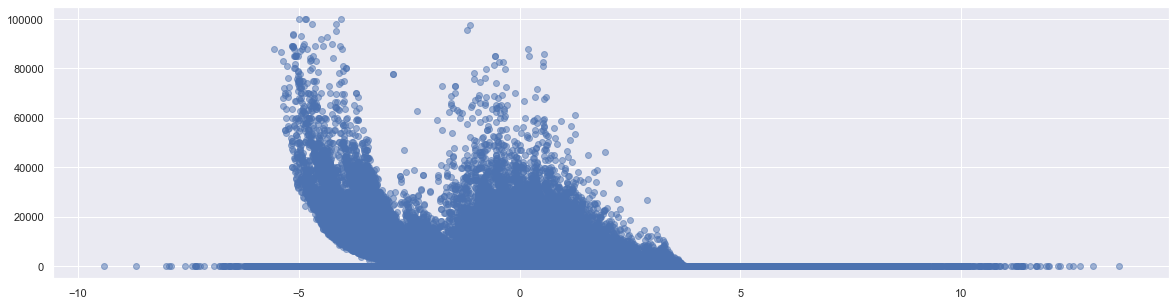

In [251]:
plt.scatter(x = "v_11", y = "price", alpha=0.5, data = subset_continuous)

### 任务3：对标签进行数据分析，并使用 log 进行转换

#### 使用Pandas对标签字段进行数据分析

In [263]:
# 小于0的值如何处理
train["price"].describe()

count    150000.000000
mean       5635.615474
std        7481.083336
min          -4.236904
25%        1000.000000
50%        2990.000000
75%        7499.000000
max       99999.000000
Name: price, dtype: float64

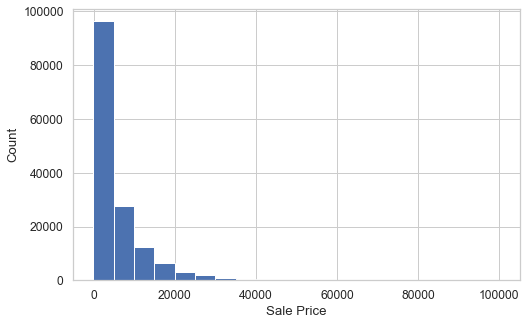

In [265]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train["price"], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')

#### 使用 log 对标签字段进行转换

In [268]:
y_trans = np.log1p(train["price"])
y_trans

0         7.523481
1         8.188967
2         8.736007
3         7.783641
4         8.556606
            ...   
149995    8.682877
149996    9.159152
149997    8.922792
149998    8.517193
149999    8.455531
Name: price, Length: 150000, dtype: float64

[Text(0.5, 0, 'Sale Price'), Text(0, 0.5, 'Count')]

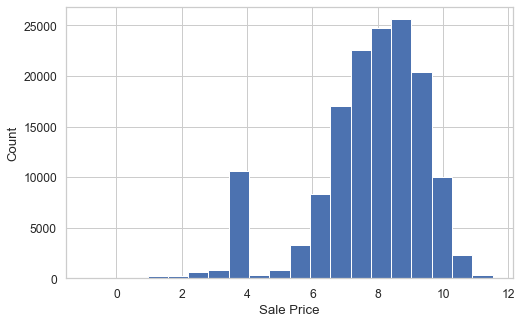

In [269]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    y_trans, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')